In [45]:
import warnings
warnings.filterwarnings('ignore')

# 분류 성능평가 종류

사이킷런의 metrics 서브패키지에서 제공하는 분류용 성능평가 명령

1. confusion_matrix(y_true, y_pred)


2. accuacy_score(y_true, y_pred)


3. precision_score(y_true, y_pred)


4. recall_score(y_true, y_pred)


5. fbeta_score(y_true, y_pred, beta)


6. f1_score(y_true, y_pred)


7. classification_report(y_true, y_pred)


8. roc_curve


9. auc


## confusion matrix(혼동행렬)

confusion matrix는 target의 실제 클래스와 model이 예측한 클래스가 일치하는지를 표로 나타낸 것이다.

In [23]:
pd.DataFrame(
    {'예측 클래스 0':['정답 클래스 0, 예측 클래스 0 표본 수', '정답 클래스 0, 예측 클래스 1 표본 수', '정답 클래스 0, 예측 클래스 2 표본 수'],
    '예측 클래스 1':['정답 클래스 1, 예측 클래스 0 표본 수', '정답 클래스 1, 예측 클래스 1 표본 수', '정답 클래스 1, 예측 클래스 2 표본 수'],
    '예측 클래스 2':['정답 클래스 2, 예측 클래스 0 표본 수', '정답 클래스 2, 예측 클래스 1 표본 수', '정답 클래스 2, 예측 클래스 2 표본 수']},
    index=['정답클래스 0', '정답클래스 1', '정답클래스 2']
)

,예측 클래스 0,예측 클래스 1,예측 클래스 2
정답클래스 0,"정답 클래스 0, 예측 클래스 0 표본 수","정답 클래스 1, 예측 클래스 0 표본 수","정답 클래스 2, 예측 클래스 0 표본 수"
정답클래스 1,"정답 클래스 0, 예측 클래스 1 표본 수","정답 클래스 1, 예측 클래스 1 표본 수","정답 클래스 2, 예측 클래스 1 표본 수"
정답클래스 2,"정답 클래스 0, 예측 클래스 2 표본 수","정답 클래스 1, 예측 클래스 2 표본 수","정답 클래스 2, 예측 클래스 2 표본 수"


사이킷런의 confusion_matrix 메소드를 이용해 다음의 실제 타겟 클래스, 예측 클래스를 이용해 혼동행렬을 만들 수 있다.

각 행렬의 원소는 실제 클래스와 예측 클래스에 따른 표본 수를 의미한다.

In [26]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

# 이진 분류 결과표

클래스가 0, 1 처럼 두 종류만 존재하는 경우 일반적으로 클래스의 이름은 양성(positive), 음성(negative)으로 구분한다.

In [30]:
pd.DataFrame({
    '양성예측':['TP', 'FP'],
    '음성예측':['FN', 'TN'],},
index=['실제양성', '실제음성']
)

,양성예측,음성예측
실제양성,TP,FN
실제음성,FP,TN


위의 혼동행렬을 이용해 암(cancer)을 검진할 때의 예시를 들어보자.

- TP : 실제 양성(암환자)을 양성으로 검진

- FP : 실제 음성(정상)을 양성으로 오진

- FN : 실제 양성(암환자)을 음성으로 오진

- TN : 실제 음성(정상)을 음성으로 검진

# 정확도

정확도(accuracy)는 일반적으로 최적화 목적함수로 사용되며 전체 샘플 중 맞게 예측한 샘플 수의 비율을 의미한다.

$$Acc = \dfrac{TP + TN}{TP + TN + FP + FN}$$

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#로지스틱 회귀를 이용한 분류 모델 생성

# 데이터 전처리
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna()

titanic.drop(['class','who','deck','embark_town','alive'], axis=1, inplace=True)

titanic['pclass'] = pd.get_dummies(titanic['pclass'])
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes
titanic['alone'] = titanic['alone'].astype('category').cat.codes
titanic['adult_male'] = titanic['adult_male'].astype('category').cat.codes
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

label = titanic.survived
titanic_df = titanic.drop('survived',axis=1)

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(titanic_df, label, test_size=0.2)

# 로지스틱 회귀 알고리즘을 이용한 생존자 이진 분류 모델
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('ACC :',np.round(accuracy_score(y_test, y_pred), 3))

confusion matrix
[[ 9  5]
 [ 4 19]]
ACC : 0.757


# 정밀도(precision)

정밀도(precision)은 실제 양성 클래스인 샘플 중 양성이라고 예측한 샘플의 수에 대한 비율을 의미한다.

$$Precision = \dfrac{TP}{TP + FP}$$

즉, 양성이라고 예측한 것 중 실제 양성인 것의 비율을 의미한다. 

극단적인 의미로 100% 확신할 수 있는 환자만 양성으로 판단하면 정밀도는 100%가 된다.

In [50]:
from sklearn.metrics import precision_score

print('PRECISION :',np.round(precision_score(y_test, y_pred), 3))

PRECISION : 0.792


# 재현율(recall)

재현율(recall)은 실제 양성인 데이터 중 양성을 얼마나 검출해냈느냐를 의미한다.

극단적인 예시로 재현율을 100%로 만드는 방법은 모든 샘플의 클래스를 양성으로 예측하는 것이다.

$$Recall = \dfrac{TP}{TP + FN}$$

In [51]:
from sklearn.metrics import recall_score

print('RECALL :',np.round(recall_score(y_test, y_pred), 3))

RECALL : 0.826


# 위양성율(fall-out)

위양성율(fall-out)은 실제 양성 클래스에 속하지 않는 표본 중 양성 클래스에 속한다고 출력한 표본의 비율이다.

재판을 예로 들면 억울한 재판 결과를 받은 사람들의 비율이다.

$$fallout = \dfrac{FP}{FP + TN}$$

# F점수

정밀도와 재현율의 가중조화평균(weight harminic average)를 F점수(F-score)라고 한다.

여기서 가중조화평균이란 a, b의 역수의 평균의 역수를 구하는 방법으로 이 가중조화평균 중 정밀도에 가중치 베타(beta)를 줄 수 있는데 여기서 베타가 1인 경우를 F1 score라고 한다.

$$F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})$$

$$F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})$$

In [52]:
from sklearn.metrics import f1_score

print('RECALL :',np.round(f1_score(y_test, y_pred), 3))

RECALL : 0.809


# classification_report

각각의 클래스를 양성(Positive) 클래스로 보았을 때의 정밀도, 재현율, F1 score를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

In [54]:
from sklearn.metrics import classification_report

y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

print(classification_report(y_true, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



위 report를 이해하는 방법은 다음과 같다.

먼저 class0에 대한 precision부터 살펴보자.

precision이란 양성이라 예측한 데이터 중 실제로 양성인 데이터의 비율을 의미한다.

따라서 class0이라 예측한 데이터 4개 중 실제로 클래스가 0인 데이터는 3이므로 75%가 된다.

class0의 recall은 0.6으로 기록되어있는데 recall은 일종의 정의구현율로 실제 양성 중 얼마나 많은 양성을 검출해냈느냐를 의미한다.

따라서 실제 class가 0인 데이터 5개 중 3개만을 검출했으므로 recall은 60%가 된다.

그리고 f1-score는 precision과 recall의 비슷할수록 높은 값을 띄는 특징이 있으므로 precision, recall의 중간에 위치하는 값이 된다.


- macro : 단순평균

- weighted : 각 클래스에 속하는 표본의 갯수로 가중평균(support)

앞서 사용했던 타이타닉 데이터 분류문제를 이용해 report를 생성한 결과는 다음과 같다.

In [57]:
y_pred = lr_clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.69      0.64      0.67        14
     class 1       0.79      0.83      0.81        23

    accuracy                           0.76        37
   macro avg       0.74      0.73      0.74        37
weighted avg       0.75      0.76      0.75        37



# ROC Curve

재현율(recall)과 위양성률(fall-out)은 일반적으로 양의 상관 관계가 있다.

범죄자 검거에 대한 예시로 이 관계를 살펴보면 다음과 같이 설명할 수 있다.

재현율(recall)은 일종의 정의구현율로 생각할 수 있다. 즉, 실제 범죄자들 중 얼마나 많은 사람들이 검거되었는지에 대한 비율이다.

만약 recall값이 0.6인 경우 실제 범죄자들 중 단 60%만이 검거되었다는 의미이다. 따라서 이 recall값을 높이기 위해선 범죄자와 일반시민을 구분하는 threshold(임계치)를 조정해 recall값을 높여야한다. 그런데 recall을 높이는 과정에서 일반 시민이 검거되는 fall-out 값이 높아지는 경우가 발생할 수 있다.

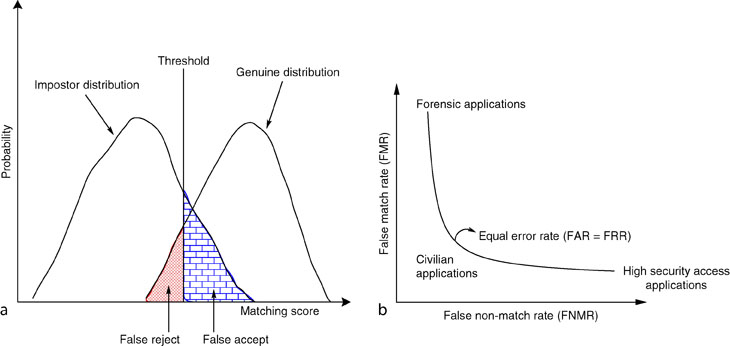

위 그림을 통해 앞서 설명한 내용의 이해를 높일 수 있다.

ROC curve는 클래스 판별 기준값(threshold)의 변화에 따라 fall-out, recall의 변화를 의미한다.

즉, 판별함수값이 음수이면 0인 클래스, 양수이면 1인 클래스로 판단하는 판별함수(discrimiannt function)에서 ROC 커브는 클래스 판별 기준값이 달라지면 그로 인한 판별 결과의 변화를 의미한다.

In [65]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


1. 현재는 0을 기준으로 클래스를 구분하여 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(negative)이다.


2. 데이터 분류가 달라지도록 기준값을 변화시킨다.


3. 기준값을 여러 방법으로 변화시키며 그에 따른 recall, fall-out 또한 변화된다.

In [62]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_1)

# 반환된 임곗값 배열에서 샘플로 데이터 추출
# thresholds[0]은 max(예측확률)+1 값이 임의로 지정됨.

thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index':thr_index,
             'FPR':fprs[thr_index],
             'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.000000,0.043478
1,2,0.000000,0.391304
2,3,0.071429,0.391304
3,4,0.071429,0.695652
4,5,0.142857,0.695652
5,6,0.142857,0.739130
6,7,0.214286,0.739130
7,8,0.214286,0.782609
8,9,0.285714,0.782609
9,10,0.285714,0.826087


In [66]:
confusion_matrix(y, y_hat, labels=[1, 0])

array([[7, 1],
       [1, 7]], dtype=int64)

In [67]:
recall = 6 / (6 + 2)
fallout = 1 / (1 + 7)
print("recall =", recall)
print("fallout =", fallout)

recall = 0.75
fallout = 0.125


In [68]:
# rov_curve는 위 과정을 지원한다.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.36316277,  2.36316277,  1.21967832,  0.37829565,  0.09428499,
        -0.76588836, -0.92693183, -4.11896895]))

In [69]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.375, 1.   ]),
 array([0.   , 0.125, 0.75 , 0.75 , 0.875, 0.875, 1.   , 1.   ]),
 array([1.9139748 , 0.9139748 , 0.77200693, 0.59346197, 0.5235538 ,
        0.31736921, 0.28354759, 0.01600107]))

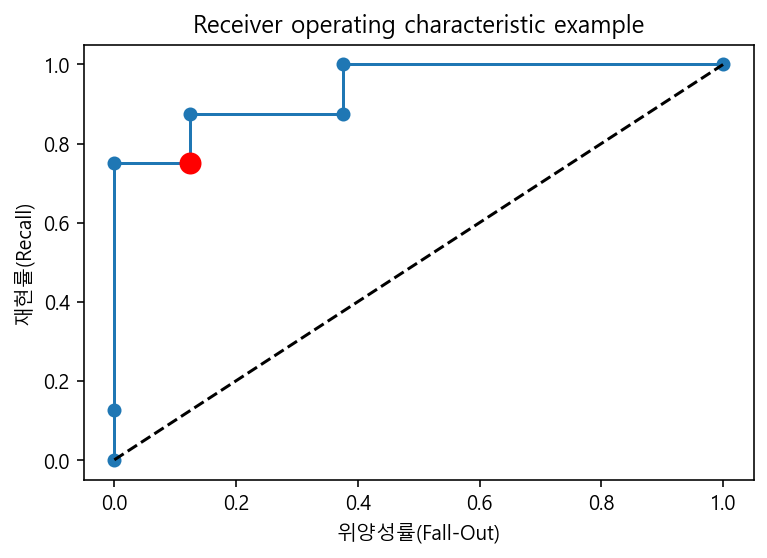

In [70]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

사이킷런에서 제공하는 분류모델은 기본적으로 정확도(ACC)를 목적함수로 사용한다.  하지만 acc, recall, precision 등의 다양한 성능을 통해 ROC커브에서 성능이 달라지는 것을 확인할 수 있다.

In [74]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

# 로지스틱 회귀 모형
model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

# 서포트 벡터 머신 모형
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

두 모형의 혼동행렬이 완전히 동일한 것을 확인할 수 있다.

In [75]:
print(confusion_matrix(y, y_hat1))

[[940   3]
 [ 30  27]]


In [76]:
print(confusion_matrix(y, y_hat2))

[[940   3]
 [ 30  27]]


하지만 ROC curve를 사용하면 아래와 같이 다른 결과를 확인할 수 있다.

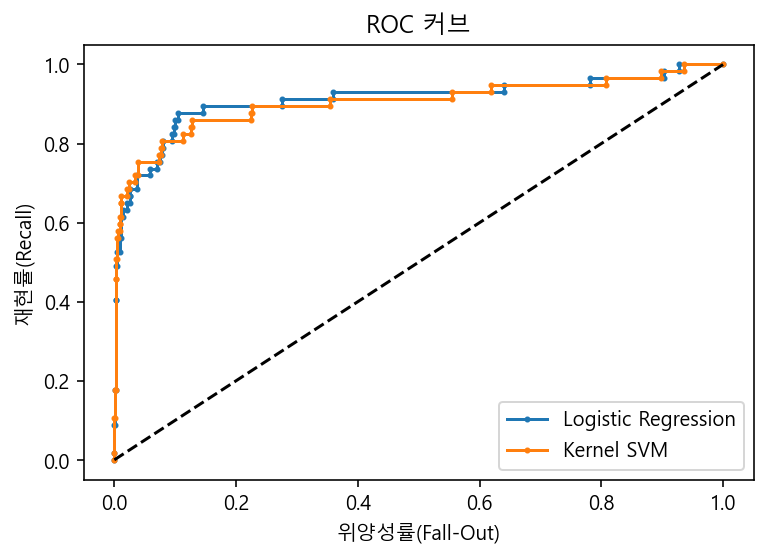

In [77]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

# AUC

AUC(Area Under the Curve)는 ROC 곡선의 면적을 의미한다. 즉, fall-out값이 같을 때 recall값이 크거나 recall값이 같을 때 fall-out값이 작을수록 AUC가 1에 가까운 좋은 모형이 된다.

In [78]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

다중 클래스에 대해서는 정밀도, 재현율을 구하거나 ROC 커브를 그릴 수 없으므로 각각의 클래스에 대해 OvR 문제를 가정하고 각각의 OvR 문제에 대해 ROC 커브를 그린다.

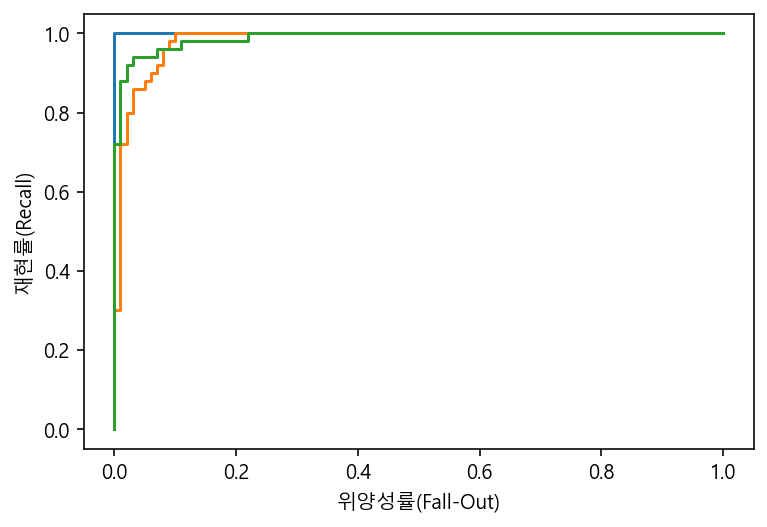

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

파란색 ROC Curve는 Setosa냐 아니냐, 초록색 Curve는 Versicolor냐 아니냐 등으로 특정 클래스가 맞냐 아니냐를 묻는 문제로 변환했기 때문에 ROC Curve는가 3개가 나오게 된다.